In [1]:
import numpy as np
import matplotlib.pyplot as plt

import json
import h5py
import os
import scipy.io

from rfdata import RFdata

%matplotlib inline


In [8]:
result_path = "/mnt/nas/2017-11-23_2/"

param_path = os.path.join(result_path, 'param.json')
medium_path = os.path.join(result_path, 'medium.mat')
sensor_path = os.path.join(result_path, 'sensor.mat')
rfdata_path = os.path.join(result_path, 'rfdata.mat')
kgrid_path = os.path.join(result_path, 'kgrig.mat')


## Simulation paramters and results

In [3]:
with open(param_path, 'r') as f: param = json.load(f)
for key in param.keys(): print(key)

grid
io
ringarray
t_end
sensor
source


In [4]:
arr_pos = scipy.io.loadmat(sensor_path)["sensor"]["mask"][0][0].T
arr_pos.shape

(256, 2)

In [5]:
mat_rfdata = h5py.File(rfdata_path, "r")["rfdata"]
mat_rfdata.shape

(16, 256, 4374)

(#source step, #sensor, #sampling)

## True medium distributions

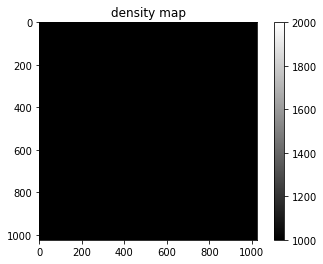

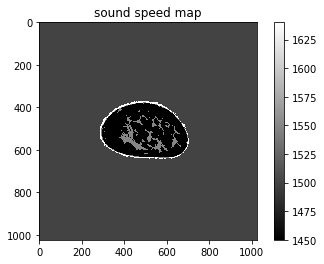

In [10]:
map_speed = h5py.File(medium_path, "r")["medium"]["sound_speed"]
map_dens = h5py.File(medium_path, "r")["medium"]["density"]

plt.imshow(map_dens, cmap='gray')
plt.plot()
plt.colorbar()
plt.title("density map")
plt.show()
plt.imshow(map_speed, cmap='gray')
plt.colorbar()
plt.title("sound speed map")
plt.show()

## RF data loading

In [11]:
rf = RFdata(
    pos = arr_pos,
    data = mat_rfdata,
    src = np.array(param["source"]["point_map"])-1,
    rcv = np.arange(param["ringarray"]["num_points"]),
    dt = 1.0/param["sensor"]["freq"],
    c = np.mean(map_speed)
)

In [12]:
rf.data.shape

(16, 256, 4374)

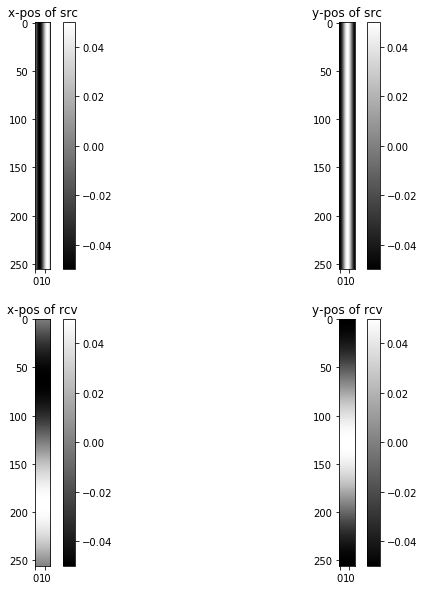

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(rf.pos_src[:,:,0], cmap='gray')
plt.colorbar()
plt.title("x-pos of src")
plt.subplot(222)
plt.imshow(rf.pos_src[:,:,1], cmap='gray')
plt.colorbar()
plt.title("y-pos of src")
plt.subplot(223)
plt.imshow(rf.pos_rcv[:,:,0], cmap='gray')
plt.colorbar()
plt.title("x-pos of rcv")
plt.subplot(224)
plt.imshow(rf.pos_rcv[:,:,1], cmap='gray')
plt.colorbar()
plt.title("y-pos of rcv")
plt.show()

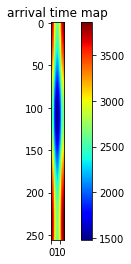

In [16]:
dist = rf.relevant_submat(np.array([-0.01,0.02])).astype(np.int16)
plt.imshow(dist, cmap='jet', interpolation='nearest')
plt.title('arrival time map')
plt.colorbar()

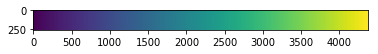

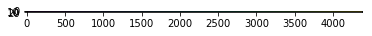

In [19]:
mat_time = np.zeros_like(rf.data, dtype=np.int16)
for i in range(mat_time.shape[2]) : mat_time[:,:,i] = i

plt.imshow(mat_time[0, :,:], interpolation='nearest')
plt.show()
plt.imshow(mat_time[:, 0,:], interpolation='nearest')
plt.show()

In [20]:
mat_time.shape

(16, 256, 4374)

In [21]:
dist.shape

(256, 16)

In [16]:
mat_time_diff = mat_time - dist[:,:,np.newaxis]

plt.imshow(mat_time_diff[0, :,:], interpolation='nearest')
plt.show()
plt.imshow(mat_time_diff[:, 0,:], interpolation='nearest')
plt.show()

ValueError: operands could not be broadcast together with shapes (16,256,4374) (256,16,1) 

In [91]:
#!mkdir result

0


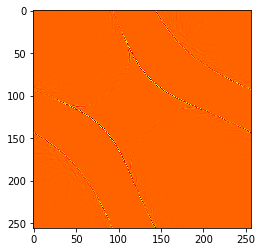

In [15]:
# for offset in np.arange(0, 1, 100):
for offset in [0]:
    
    print(offset)

    mat_filter = np.ones_like(mat_time)
    mat_filter *= (mat_time_diff == offset)*1

    # plt.imshow(mat_filter[0, :, :])
    # plt.show()
    # plt.imshow(mat_filter[:, 0, :])
    # plt.show()

    # plt.plot(mat_filter[20,200,:])

    rf_filtered = rf.data * mat_filter
    map_filtered =np.sum(rf_filtered, axis=2)
    plt.imshow(map_filtered, cmap='hot', interpolation='nearest')
#     plt.savefig('result/{0:0>5}.png'.format(offset))

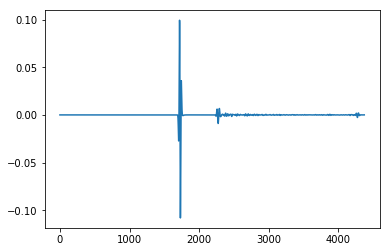

In [17]:
plt.plot(rf.data[150,100,:])

In [18]:
np.sum(map_filtered)

-0.10101671271770109